In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('C:\\Users\\adhik\\Downloads\\TensorFlow_FILES\\DATA\\fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


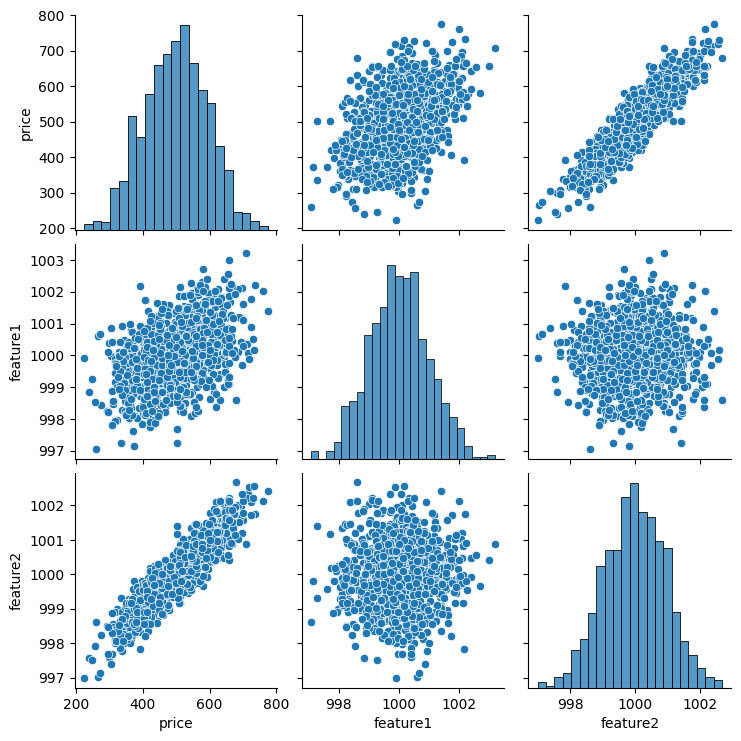

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split



In [6]:
X = df[['feature1','feature2']].values #values convert it to array

In [7]:
Y = df['price'].values  #convert   it to array by numpy 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(670, 2)

In [10]:
X_test.shape

(330, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#help(MinMaxScaler)

In [13]:
#creating a instance of the MinMaxScaler 
scaler = MinMaxScaler()


In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)


In [16]:
X_test = scaler.transform(X_test)  #this won't be transforming because its not fitted on the scaler

In [17]:
X_train.min()

0.0

In [18]:
from tensorflow.keras.models import Sequential ## base model
from tensorflow.keras.layers import Dense ## adding layers

In [19]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(layers=None, trainable=True, name=None)
 |
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |
 |  Examples:
 |
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |
 |  # When using the del

In [20]:
#prefered method
#create a empty sequential model first then add the layers latter on
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop',loss = 'mse')


In [21]:
model.fit(x=X_train,y=Y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 256103.8750
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258982.1562 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256238.0625 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 252469.1719
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 258614.6406
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253459.6562 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 256307.6719
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 255284.1875
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 253515.2656
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259570.8750 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257295.1875 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258227.6094 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 264408.6250
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step -

In [22]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

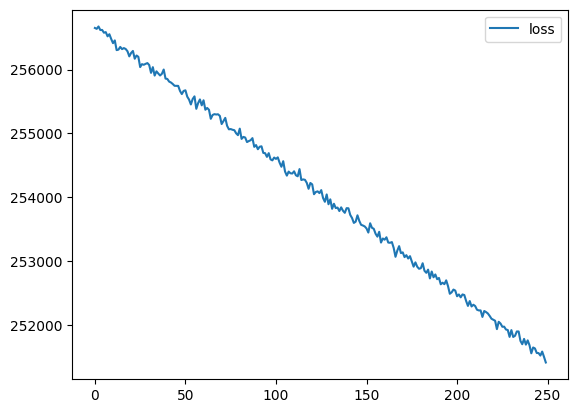

In [23]:
loss_df.plot()

In [24]:
model.evaluate(X_test,Y_test,verbose = 0)

252343.6875

In [25]:
model.evaluate(X_train,Y_train,verbose=0)

251517.328125

In [26]:
test_prediction = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [27]:
# test_prediction


In [28]:
import pandas as pd
test_prediction = pd.Series(test_prediction.reshape(330,))

In [29]:
pred_df = pd.DataFrame(Y_test,columns = ['Test True Y'])

In [30]:
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [31]:
pred_df = pd.concat([pred_df,test_prediction],axis=1)

In [32]:
pred_df.head()

,Test True Y,0
0,402.296319,5.255928
1,624.156198,5.255928
2,582.455066,5.255928
3,578.588606,5.255928
4,371.224104,5.255928


In [33]:
pred_df.columns = ['Test True Y','NAN','Model Predictions']
pred_df.dropna()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [ ]:
pred_df.head()


In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'],pred_df['NAN'])